In [2]:
import numpy as np
import os
os.chdir('/Users/smust4/Downloads')
os.getcwd()
import pandas as pd
from datetime import datetime
import numpy as np

In [205]:
jj = pd.read_csv("ct_rr.csv")

In [186]:
jj.head(10)

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950
5,2018-04-07 07:43:08,05408,12.899421,77.587326,12.934780,77.569950
6,2018-04-07 07:43:55,50266,12.898679,77.604340,12.877949,77.595900
7,2018-04-07 07:52:31,58940,12.918229,77.607544,12.968971,77.636375
8,2018-04-07 07:52:42,58940,12.918229,77.607544,12.968971,77.636375
9,2018-04-07 07:53:23,28126,12.911840,77.602250,12.940866,77.540710


In [198]:
jj = jj[jj["drop_lat"]>0]
jj = jj[jj["drop_lng"]>0]

In [199]:
jj.shape

(8379724, 6)

In [5]:
jj.number.nunique()

170392

In [6]:
jj.shape

(8381556, 6)

In [9]:
from sklearn import preprocessing

In [148]:
minmax_scale = preprocessing.MinMaxScaler().fit(jj[['pick_lat', 'pick_lng',"drop_lat","drop_lng"]])
df_minmax = minmax_scale.transform(jj[['pick_lat', 'pick_lng',"drop_lat","drop_lng"]])


In [149]:
pickup_data = pd.DataFrame()
pickup_data[["ts","number"]] = jj[["ts","number"]]

In [150]:
drop_data = pd.DataFrame()
drop_data[["ts","number"]] = jj[["ts","number"]]

In [109]:
pickup_data["pick_lat"] = df_minmax[:,0]
pickup_data["pick_lng"] = df_minmax[:,1]



In [144]:
df_minmax

array([[0.52448193, 0.91349954, 0.58787678, 0.67531405],
       [0.5298939 , 0.91833189, 0.59345733, 0.67842432],
       [0.52951316, 0.91847406, 0.59329634, 0.67851081],
       ...,
       [0.5297248 , 0.91881255, 0.59305394, 0.67871107],
       [0.5297248 , 0.91881255, 0.59305394, 0.67871107],
       [0.52952706, 0.9185147 , 0.5930772 , 0.67877304]])

In [151]:
drop_data["drop_lat"] = df_minmax[:,2]
drop_data["drop_lng"] = df_minmax[:,3]


In [152]:
drop_data.head()

,ts,number,drop_lat,drop_lng
0,2018-04-07 07:07:17,14626,0.587877,0.675314
1,2018-04-07 07:32:27,85490,0.593457,0.678424
2,2018-04-07 07:36:44,05408,0.593296,0.678511
3,2018-04-07 07:38:00,58940,0.593583,0.678730
4,2018-04-07 07:39:29,05408,0.593296,0.678511


In [ ]:
#But since the data is already in the same scale we don't need to do that 

# Pickup cluster 

In [225]:
X = jj[["pick_lat","pick_lng"]]


In [171]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(i)


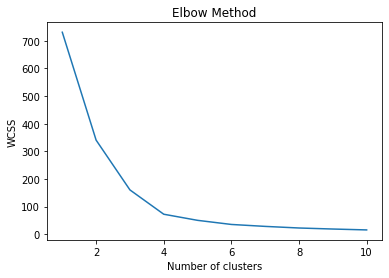

In [29]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [221]:
kmeans = KMeans(n_clusters=5)
pred_y = kmeans.fit_predict(X)

In [222]:
kmeans.cluster_centers_

array([[  12.9329798 ,   77.60733118],
       [   1.70828855,    0.22620722],
       [  27.38186515,   78.24172939],
       [  17.84896041,   80.22710828],
       [  37.28195395, -101.2436145 ]])

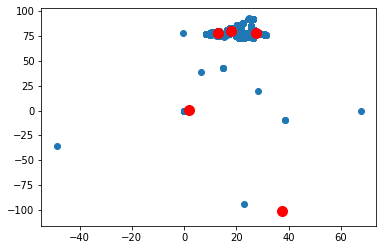

In [226]:
plt.scatter(X["pick_lat"], X["pick_lng"])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

In [227]:
pickup_lables = list(kmeans.labels_)

In [228]:
jj["picup_labels"] = pickup_lables

# Drop_cluster

In [214]:
X = jj[["drop_lat","drop_lng"]]

In [215]:
kmeans = KMeans(n_clusters=4)
pred_y = kmeans.fit_predict(X)

In [218]:
drop_lables = list(kmeans.labels_)
jj["drop_labels"] = drop_lables

In [ ]:
jj.head()

In [219]:
jj.drop_labels.value_counts()

0    8289759
3      64906
2      24603
1       2288
Name: drop_labels, dtype: int64

In [229]:
jj.head()


,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,drop_labels,picup_labels
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280,0,0
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770,0,0
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950,0,0
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375,0,0
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950,0,0


In [230]:
jj.drop_labels.value_counts()

0    8289759
3      64906
2      24603
1       2288
Name: drop_labels, dtype: int64

In [232]:
jj.picup_labels.value_counts()

0    8289759
3      64906
2      24603
1       2183
4        105
Name: picup_labels, dtype: int64

In [ ]:
#unfortunetly it seems that one cluster has got too many observations
we check the centraoid of the clusters and it seems that the data has different cities with bangalore being the most 
common citi and hence in clustering it comes in one cluster.

In [ ]:
checking the pick up and drop centroid we find that the location in kormangala bangalore